**Done Using Colab**

In [321]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, power_transform
train , test = pd.read_csv('cleaned_train.csv'), pd.read_csv('cleaned_test.csv')

In [338]:
train.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Scaled_Distance,Log_Distance,box_cos_distance,Amount (Million Naira)
0,VHL12546,17,142,2011,18,94903.339506,1,0,0,0,0,1,-0.071802,11.460614,0.127860,2.2
1,VHL18827,19,1204,2012,18,125000.000000,0,1,0,0,0,1,0.260450,11.736069,0.529591,3.5
2,VHL19499,29,1040,2010,17,110852.000000,0,0,1,0,1,0,0.104263,11.615951,0.349130,9.2
3,VHL17991,34,590,2017,3,30000.000000,1,0,0,0,1,0,-0.788303,10.308953,-1.156289,22.8
4,VHL12170,53,659,2002,17,125206.000000,0,1,0,0,0,1,0.262724,11.737716,0.532124,2.6


In [339]:
all = pd.concat([train, test],ignore_index = True)

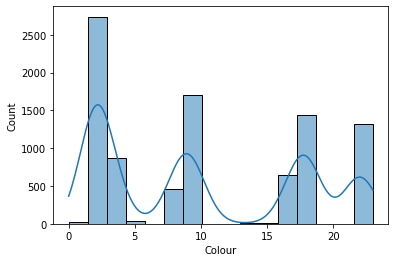

In [340]:
sns.histplot(x = 'Colour', kde = True, data  = all)

In [341]:
train.shape, test.shape

((7205, 16), (2061, 15))

In [352]:
all['log_Colour'] = np.log(all.Colour + 1)
all['cox_colour'] = power_transform(all[['Colour']] + 1, method='box-cox')
all['log_Year'] = np.log2(all.Year)
all['sqrt_Year'] = np.sqrt(all.Year)
all['cox_Year'] = power_transform(all[['Year']], method='box-cox')

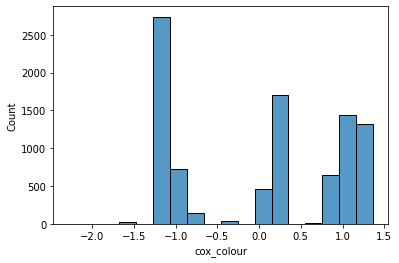

In [355]:
sns.histplot(x = 'cox_colour', data = all)

In [356]:
X = train.drop(columns  = ['VehicleID','Amount (Million Naira)'])
y = train['Amount (Million Naira)']

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [377]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(random_state = 0,objective ='reg:squarederror',learning_rate = .2, max_depth = 3, min_child_weight = 3)
xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_test)
mean_squared_error(y_test,xgb_preds,squared=False)

9.403442200185355

In [392]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [399]:
# from catboost import CatBoostRegressor
# cat = CatBoostRegressor( silent = True, eval_metric  = 'RMSE')
# cat.fit(X_train , y_train)
# cat_preds = cat.predict(X_test)
# mean_squared_error(y_test,cat_preds,squared=False)

9.125842078004805

In [402]:
!pip install -q optuna

     |████████████████████████████████| 308 kB 9.5 MB/s 
     |████████████████████████████████| 209 kB 36.5 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 112 kB 57.4 MB/s 
     |████████████████████████████████| 146 kB 49.0 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 


Text(0.5, 0, 'Feature Importance')

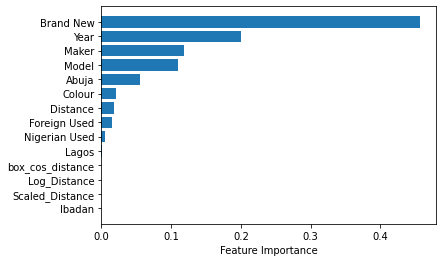

In [362]:
import matplotlib.pyplot as plt
sort = xgb.feature_importances_.argsort()
plt.barh(X.columns[sort], xgb.feature_importances_[sort])
plt.xlabel("Feature Importance")


In [400]:
 
 
sub_file = pd.DataFrame({
      'VehicleID': test['VehicleID'],
      'Amount (Million Naira)': cat.predict(test.drop(columns = ['VehicleID']))
  })

sub_file.to_csv('preds_cat1.csv', index = False)

In [ ]:
# XGBRegressor(learning_rate = .2, max_depth = 3, min_child_weight = 2)